In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [2]:
# Input File
df0 = pd.read_pickle('df.pkl')

In [12]:
df = df0.copy()
df = df.astype(float)

# Data Overview

In [13]:
df.head()

,M30Y,T10Y,T2Y,FED,AAA,BAA,T10-2,T10-F,A-B,A-T10
date,,,,,,,,,,
1976-06-04,8.78,7.92,7.21,5.54,8.63,9.90,3.24,2.38,-1.27,0.71
1976-06-11,8.83,7.88,7.06,5.44,8.63,9.91,3.39,2.44,-1.28,0.75
1976-06-18,8.88,7.84,7.03,5.47,8.62,9.87,3.41,2.37,-1.25,0.78
1976-06-25,8.90,7.81,7.00,5.48,8.60,9.87,3.42,2.33,-1.27,0.79
1976-07-02,8.93,7.86,7.01,5.58,8.63,9.89,3.35,2.28,-1.26,0.77


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2471 entries, 1976-06-04 to 2023-10-06
Freq: W-FRI
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   M30Y    2471 non-null   float64
 1   T10Y    2471 non-null   float64
 2   T2Y     2471 non-null   float64
 3   FED     2471 non-null   float64
 4   AAA     2471 non-null   float64
 5   BAA     2471 non-null   float64
 6   T10-2   2471 non-null   float64
 7   T10-F   2471 non-null   float64
 8   A-B     2471 non-null   float64
 9   A-T10   2471 non-null   float64
dtypes: float64(10)
memory usage: 212.4 KB


In [15]:
df.describe()

,M30Y,T10Y,T2Y,FED,AAA,BAA,T10-2,T10-F,A-B,A-T10
count,2471.000000,2471.000000,2471.000000,2471.000000,2471.000000,2471.000000,2471.000000,2471.000000,2471.000000,2471.000000
mean,7.675820,5.894860,5.010089,4.654197,7.070437,8.137985,3.021623,1.240664,-1.067548,1.175577
std,3.413035,3.314131,3.758249,4.022972,2.947903,3.149566,1.467048,1.576353,0.437898,0.539386
min,2.650000,0.550000,0.110000,0.040000,2.030000,3.150000,-5.260000,-7.750000,-3.470000,-0.390000
25%,4.850000,3.070000,1.595000,1.030000,4.690000,5.730000,2.075000,0.330000,-1.220000,0.800000
50%,7.080000,5.430000,4.780000,4.710000,6.860000,7.850000,3.200000,1.410000,-0.950000,1.130000
75%,9.750000,8.030000,7.335000,6.745000,8.870000,9.910000,4.110000,2.360000,-0.770000,1.580000
max,18.630000,15.680000,16.820000,20.060000,15.850000,17.290000,6.840000,4.110000,-0.520000,2.870000


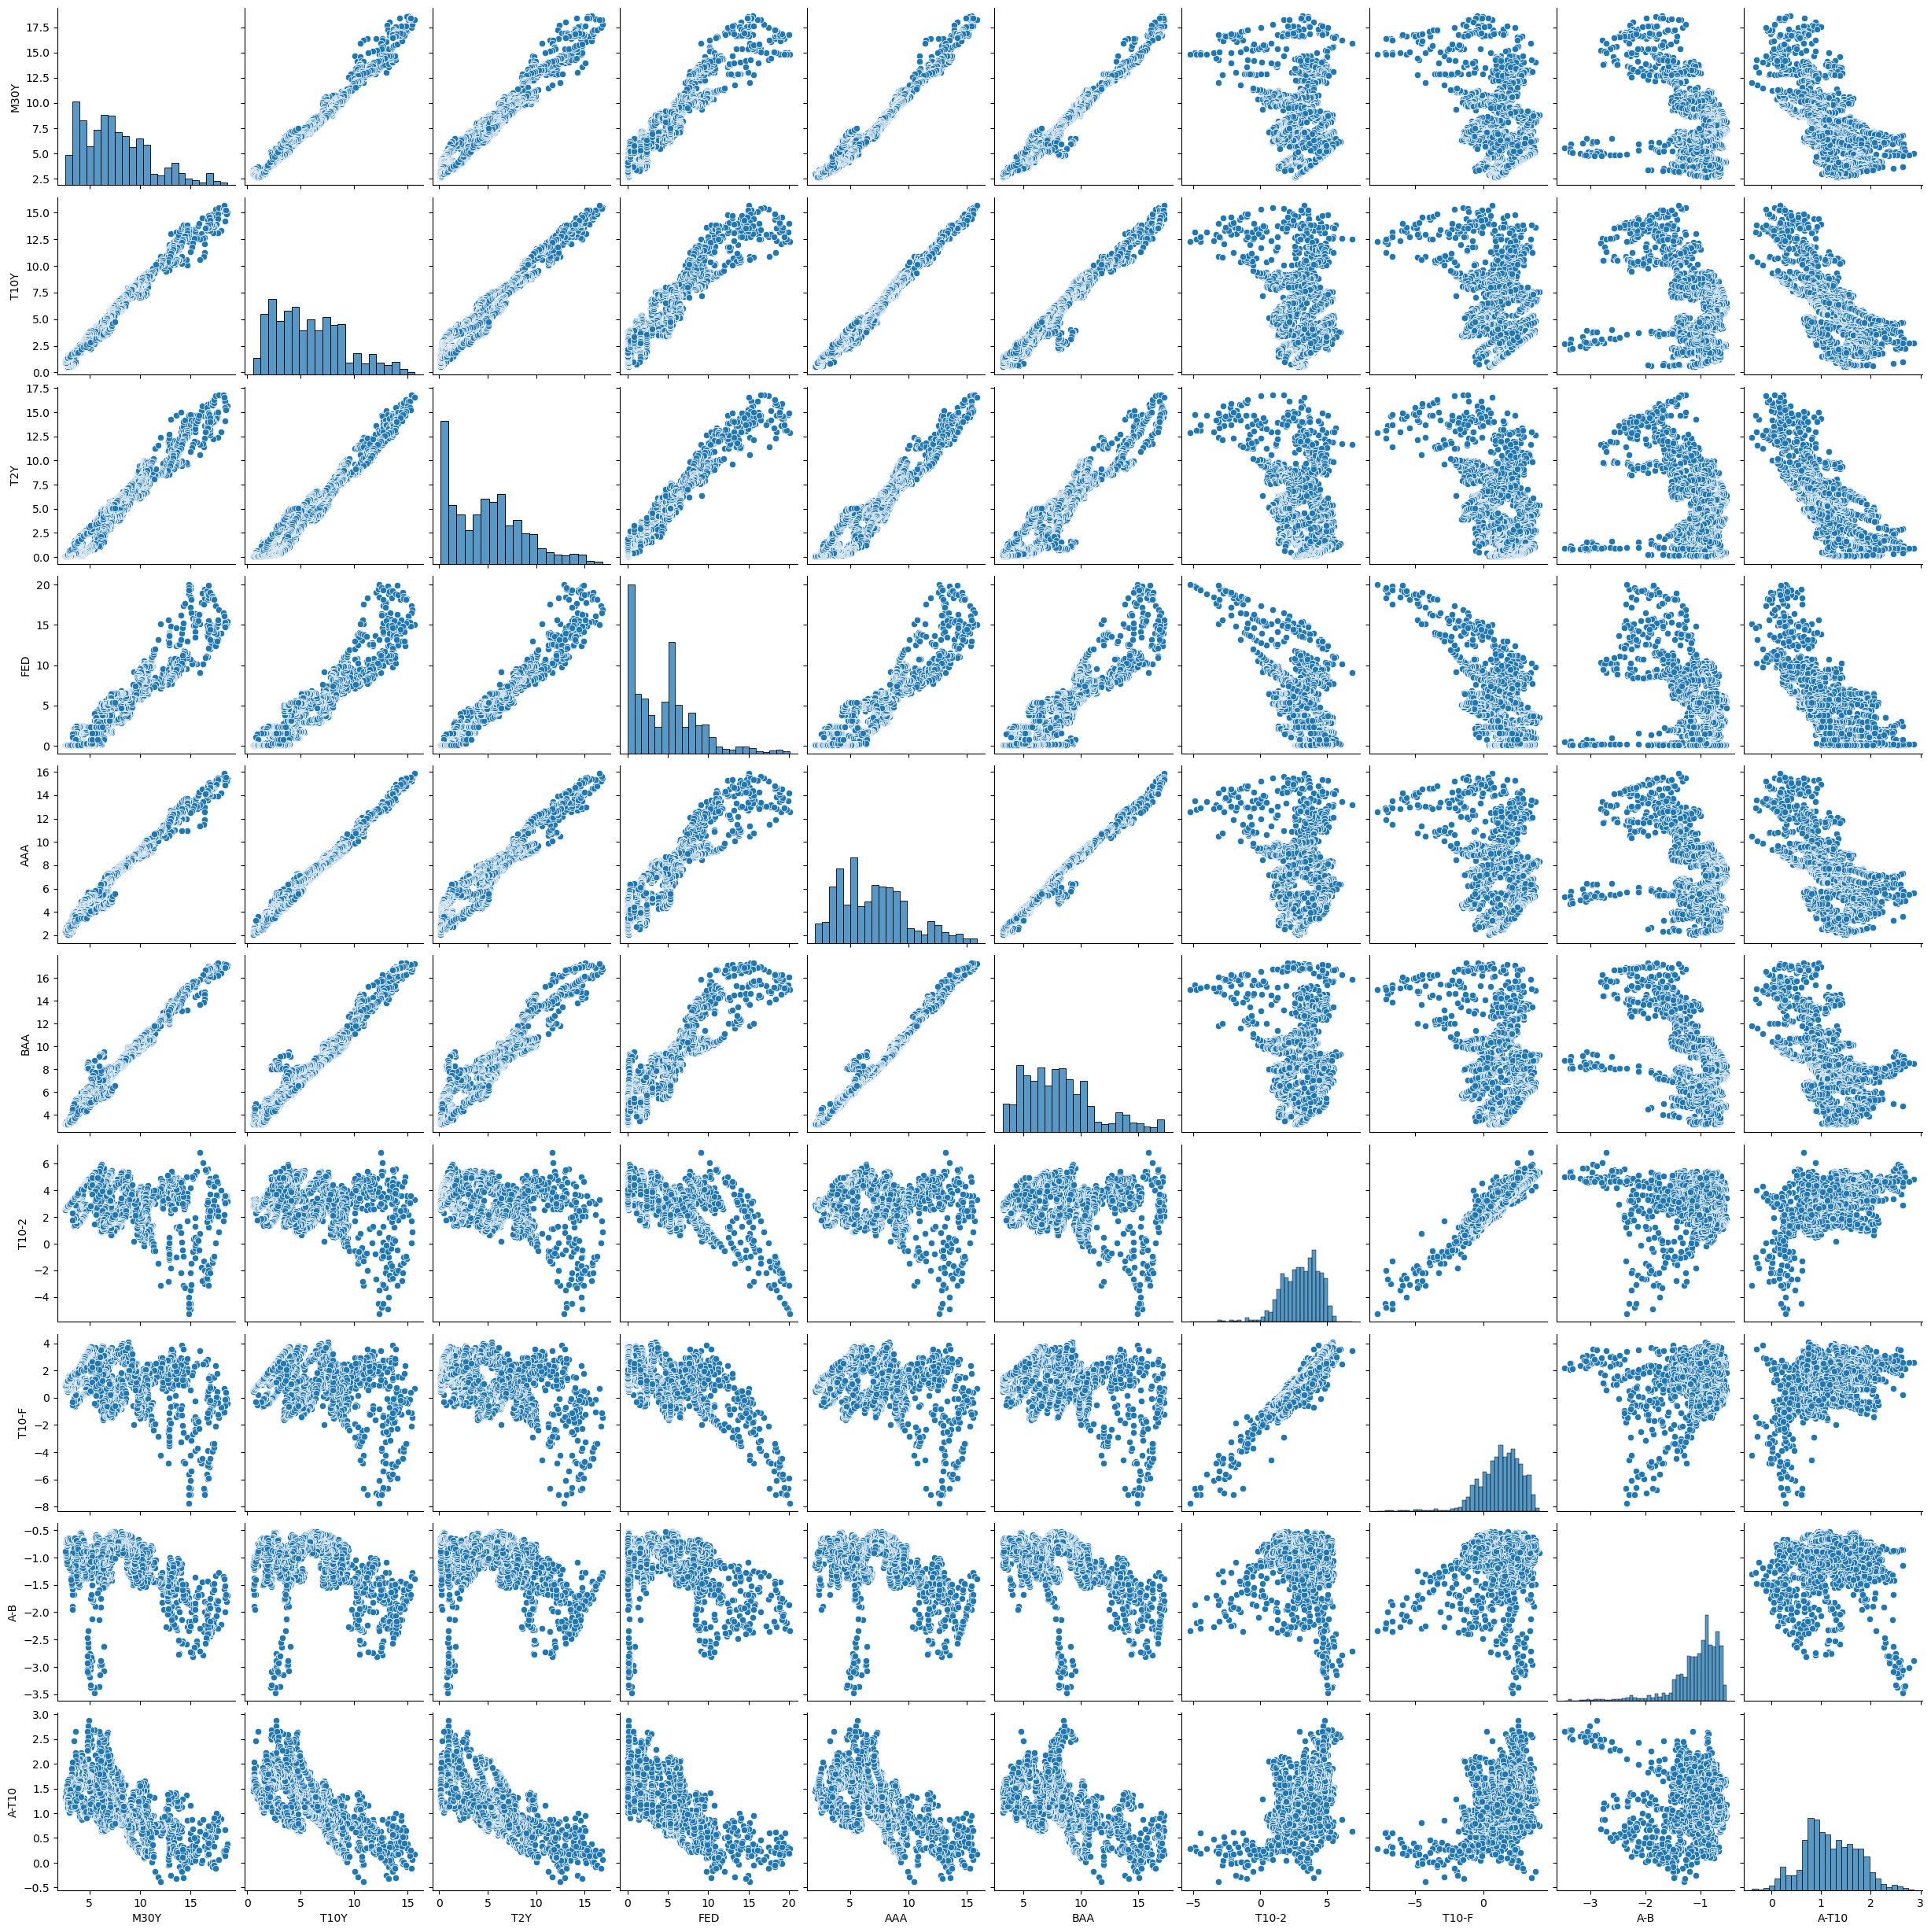

In [16]:
sns.pairplot(df)

<Axes: xlabel='date', ylabel='M30Y'>

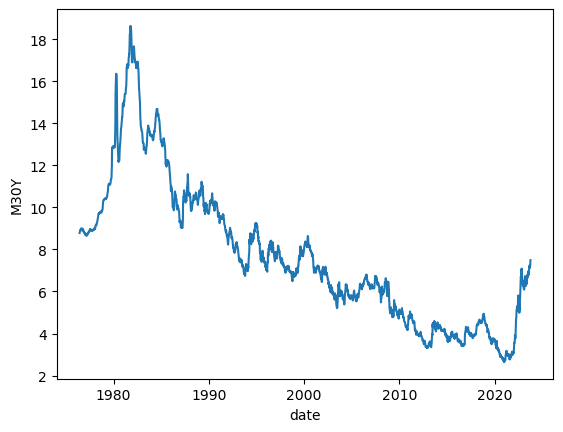

In [20]:
sns.lineplot(df['M30Y'])

<Axes: >

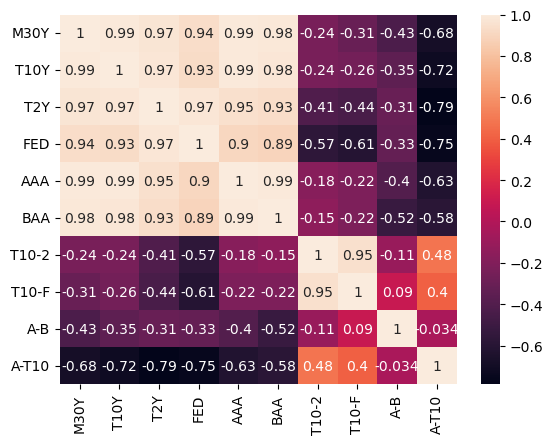

In [21]:
sns.heatmap(df.corr(), annot = True)

# Correlation Analysis

In [8]:
def highlight_strong_corr(val):
    color = 'background-color: yellow' if val >= 0.9 or val <= -0.9 else ''
    return color

def gradient_color_df(df, cmap='coolwarm'):
    def gradient_corr(val):
        cmap_palette = sns.color_palette(cmap, as_cmap=True)
        normed_val = (val - df.min().min()) / (df.max().max() - df.min().min())
        rgba = cmap_palette(normed_val)
        return f'background-color: rgba{rgba[0]*255, rgba[1]*255, rgba[2]*255, rgba[3]}'
    styled_df = df.style.applymap(gradient_corr)
    return styled_df

def sig_p_color(val):
    color = 'background-color: yellow' if val <= 0.05 and val>=0 else ''
    return color

In [9]:
def fishersz(correlation1, correlation2, n1,n2):
    # Fisher's z transformation
    z1 = np.arctanh(correlation1)
    z2 = np.arctanh(correlation2)

    # Calculate the standard errors of the z-transformed correlations
    se1 = 1 / np.sqrt(n1 - 3) 
    se2 = 1 / np.sqrt(n2 - 3)  

    # z-test statistic
    z = (z1 - z2) / np.sqrt(se1**2 + se2**2)

    # Calculate the two-tailed p-value
    p_value = 2 * (1 - st.norm.cdf(abs(z)))

    # Print the results
    print(f'Correlation1: {correlation1:.3f}')
    print(f'Correlation2: {correlation2:.3f}')
    print(f'Fisher\'s z1: {z1:.3f}')
    print(f'Fisher\'s z2: {z2:.3f}')
    print(f'Z-test statistic: {z:.3f}')
    print(f'P-value: {p_value:.3f}')
    return p_value

Lagged Analysis

In [4]:
def shifted_correlation(period):
    y = df['M30Y'].copy()
    ndf = pd.concat([y, df.copy().shift(period)], axis=1)
    ndf.columns.values[0] = 'Original 30Y'
    corr = ndf.corr()['Original 30Y'][1:]
    return ndf, corr

In [28]:
# Current Week's 30Yr Mortgage Correlation with Shifted Features
shift_corr = []

for lag in [2, 4, 8, 12, 16, 20]:
    ndf,corr = shifted_correlation(lag)
    shift_corr.append(corr)

shift_corr = pd.DataFrame(shift_corr).transpose()
shift_corr.columns = ['2Wks','4Wks','8Wks','12Wks','16Wks','20Wks']
shift_corr.style.applymap(highlight_strong_corr)

,2Wks,4Wks,8Wks,12Wks,16Wks,20Wks
M30Y,0.998566,0.996119,0.990174,0.984884,0.980398,0.975780
T10Y,0.990253,0.989412,0.985217,0.979868,0.975017,0.970601
T2Y,0.973656,0.974087,0.971707,0.967867,0.964587,0.961939
FED,0.937148,0.937778,0.937538,0.937142,0.936742,0.936505
AAA,0.987357,0.985743,0.980267,0.974016,0.968349,0.963065
BAA,0.982977,0.980648,0.974454,0.968057,0.962274,0.956630
T10-2,-0.246759,-0.254238,-0.267547,-0.279040,-0.288693,-0.299169
T10-F,-0.310033,-0.313825,-0.322993,-0.334469,-0.345014,-0.355244
A-B,-0.423199,-0.417357,-0.409855,-0.406162,-0.403027,-0.398365
A-T10,-0.688649,-0.692954,-0.698360,-0.700990,-0.703458,-0.705954


Hypothesis Test 1.1
- Null hypothesis = There is no statistically significant difference between the correlation using the Aaa-10Y Treasury from 50Wks ago with this week's 30Yr Mortgage and using the Aaa-10Y Treasury from 2Wks ago with this week's 30Yr Mortgage

In [64]:
# Hypothesis Test 1.1: Fisher's Z transformation
fishersz(shifted_correlation(50)[1].iloc[-1],shifted_correlation(2)[1].iloc[-1],
        len(shifted_correlation(50)[0].dropna()),len(shifted_correlation(2)[0].dropna()))

Correlation1: -0.714
Correlation2: -0.689
Fisher's z1: -0.895
Fisher's z2: -0.845
Z-test statistic: -1.736
P-value: 0.083


0.08257849444450027

Event Analysis

In [6]:
# List of events 
rec_80 = [pd.to_datetime('1980-01-01'),pd.to_datetime('1982-12-01')] # Volker recession + Iran Revolution
rec_80_r = [pd.to_datetime('1982-12-01'),pd.to_datetime('1984-12-01')] # 2Y Recovery post 80s
gulf_war = [pd.to_datetime('1990-07-01'),pd.to_datetime('1991-04-01')] # Gulf War
gulf_war_r = [pd.to_datetime('1991-04-01'),pd.to_datetime('1991-06-01')] # 2Y Gulf War Recovery
pre_dot_com = [pd.to_datetime('1999-03-01'),pd.to_datetime('2001-03-01')] # 2Y before Dot Com
dot_com = [pd.to_datetime('2001-03-01'),pd.to_datetime('2001-12-01')] # Dot Com
dot_com_r = [pd.to_datetime('2001-12-01'),pd.to_datetime('2003-12-01')] # 2Y Dot Com Recovery
pre_gfc = [pd.to_datetime('2005-12-01'),pd.to_datetime('2007-12-01')] # 2Y before GFC
gfc = [pd.to_datetime('2007-12-01'),pd.to_datetime('2009-08-01')] # GFC
gfc_r = [pd.to_datetime('2009-08-01'),pd.to_datetime('2011-08-01')] # 2Y GFC Recovery
covid = [pd.to_datetime('2020-12-01'),pd.to_datetime('2022-12-01')] # 2Y COVID Recovery

In [7]:
events = [
    ('80s Recession', rec_80),
    ('80s Recovery', rec_80_r),
    ('Gulf War', gulf_war),
    ('Gulf War Recovery', gulf_war_r),
    ('Pre Dot-Com', pre_dot_com),
    ('Dot-Com', dot_com),
    ('Dot-Com Recovery', dot_com_r),
    ('Pre GFC',pre_gfc),
    ('GFC',gfc),
    ('GFC Recovery',gfc_r),
    ('COVID Recovery', covid)
    
]

correlation_df = pd.DataFrame(index=['T10Y', 'T2Y', 'FED', 'AAA', 'BAA', 'T10-2', 'T10-F', 'A-B', 'A-T10'])

# Calculate correlations for each time period
for event_name, event_period in events:
    subset = df[(df.index >= event_period[0]) & (df.index <= event_period[1])]
    correlations = subset.corrwith(subset['M30Y'])
    correlation_df[event_name] = correlations

In [29]:
correlation_df.style.applymap(highlight_strong_corr)

,80s Recession,80s Recovery,Gulf War,Gulf War Recovery,Pre Dot-Com,Dot-Com,Dot-Com Recovery,Pre GFC,GFC,GFC Recovery,COVID Recovery
T10Y,0.869088,0.835008,0.950867,0.466053,0.899374,0.941565,0.962309,0.801545,0.782859,0.945634,0.991355
T2Y,0.768362,0.881723,0.931016,0.684039,0.963324,0.874675,0.953907,0.443005,0.807015,0.927192,0.991440
FED,0.477350,0.863841,0.911542,0.504389,0.432419,0.633490,0.689112,0.221639,0.621683,-0.169606,0.895166
AAA,0.911609,0.862706,0.966882,0.568844,0.926580,0.612937,0.895270,0.893854,0.559011,0.846086,0.984655
BAA,0.929929,0.803459,0.722020,0.508391,0.897676,0.514708,0.885181,0.912937,-0.358455,0.850338,0.989899
T10-2,0.087930,-0.465259,-0.783535,-0.311088,0.266975,-0.481285,0.803314,0.315317,-0.256607,0.989933,0.660250
T10-F,-0.070747,0.042001,-0.713659,-0.321280,0.128125,-0.397278,0.698465,0.371768,-0.388245,0.937499,-0.118655
A-B,-0.182587,0.140484,0.447679,-0.230007,0.354808,0.537553,-0.533402,0.360138,0.598162,-0.088367,-0.895286
A-T10,-0.164132,-0.721913,-0.701280,-0.030454,-0.303472,-0.888026,-0.257130,-0.052906,-0.571174,-0.811935,-0.548520


In [30]:
gradient_color_df(correlation_df)

,80s Recession,80s Recovery,Gulf War,Gulf War Recovery,Pre Dot-Com,Dot-Com,Dot-Com Recovery,Pre GFC,GFC,GFC Recovery,COVID Recovery
T10Y,0.869088,0.835008,0.950867,0.466053,0.899374,0.941565,0.962309,0.801545,0.782859,0.945634,0.991355
T2Y,0.768362,0.881723,0.931016,0.684039,0.963324,0.874675,0.953907,0.443005,0.807015,0.927192,0.991440
FED,0.477350,0.863841,0.911542,0.504389,0.432419,0.633490,0.689112,0.221639,0.621683,-0.169606,0.895166
AAA,0.911609,0.862706,0.966882,0.568844,0.926580,0.612937,0.895270,0.893854,0.559011,0.846086,0.984655
BAA,0.929929,0.803459,0.722020,0.508391,0.897676,0.514708,0.885181,0.912937,-0.358455,0.850338,0.989899
T10-2,0.087930,-0.465259,-0.783535,-0.311088,0.266975,-0.481285,0.803314,0.315317,-0.256607,0.989933,0.660250
T10-F,-0.070747,0.042001,-0.713659,-0.321280,0.128125,-0.397278,0.698465,0.371768,-0.388245,0.937499,-0.118655
A-B,-0.182587,0.140484,0.447679,-0.230007,0.354808,0.537553,-0.533402,0.360138,0.598162,-0.088367,-0.895286
A-T10,-0.164132,-0.721913,-0.701280,-0.030454,-0.303472,-0.888026,-0.257130,-0.052906,-0.571174,-0.811935,-0.548520


Hypothesis Test 1.2
- Null hypothesis = There are no statistically significant differences between the correlations with 30Yr Mortgage rates in recent recoveries (COVID, GFC, Dot-COM) against historical recoveries (80s Recession, Gulf War)

In [ ]:
fishersz(shifted_correlation(50)[1].iloc[-1],shifted_correlation(2)[1].iloc[-1],
        len(shifted_correlation(50)[0].dropna()),len(shifted_correlation(2)[0].dropna()))

Hypothesis Test 1.2.1
- COVID Recovery vs 80s Recovery

In [11]:
# function for getting n during hypothesis 1.2-1.4 testing:
def n1_2(covid):
    return len(df[(df.index >= covid[0]) & (df.index <= covid[1])])

# Hypothesis 1.2 Testing
def hypo1_2 (cola,colb, covid, rec_80_r):
    p_table = []
    for x in range(0,9):
        a = fishersz(correlation_df[cola].iloc[x],correlation_df[colb].iloc[x],
                n1_2(covid), n1_2(rec_80_r))
        p_table.append(a)
    formatted_list = [ '%.2f' % elem for elem in p_table ]
    aa = pd.concat([pd.Series(correlation_df.index),pd.Series(formatted_list),
                   pd.Series(correlation_df[cola].values),pd.Series(correlation_df[colb].values)],
                    axis = 1)
    aa.columns = ['Instruments','P Value',cola,colb]
    aa = aa.set_index('Instruments')
    return aa

In [111]:
hypo_1_2_1 = hypo1_2('COVID Recovery','80s Recovery',covid, rec_80_r)

Correlation1: 0.991
Correlation2: 0.835
Fisher's z1: 2.720
Fisher's z2: 1.204
Z-test statistic: 10.795
P-value: 0.000
Correlation1: 0.991
Correlation2: 0.882
Fisher's z1: 2.725
Fisher's z2: 1.383
Z-test statistic: 9.555
P-value: 0.000
Correlation1: 0.895
Correlation2: 0.864
Fisher's z1: 1.447
Fisher's z2: 1.308
Z-test statistic: 0.991
P-value: 0.322
Correlation1: 0.985
Correlation2: 0.863
Fisher's z1: 2.431
Fisher's z2: 1.304
Z-test statistic: 8.031
P-value: 0.000
Correlation1: 0.990
Correlation2: 0.803
Fisher's z1: 2.642
Fisher's z2: 1.108
Z-test statistic: 10.923
P-value: 0.000
Correlation1: 0.660
Correlation2: -0.465
Fisher's z1: 0.793
Fisher's z2: -0.504
Z-test statistic: 9.241
P-value: 0.000
Correlation1: -0.119
Correlation2: 0.042
Fisher's z1: -0.119
Fisher's z2: 0.042
Z-test statistic: -1.149
P-value: 0.251
Correlation1: -0.895
Correlation2: 0.140
Fisher's z1: -1.448
Fisher's z2: 0.141
Z-test statistic: -11.322
P-value: 0.000
Correlation1: -0.549
Correlation2: -0.722
Fisher's z1

In [112]:
hypo_1_2_1

,P Value,COVID Recovery,80s Recovery
Instruments,,,
T10Y,0.00,0.991355,0.835008
T2Y,0.00,0.991440,0.881723
FED,0.32,0.895166,0.863841
AAA,0.00,0.984655,0.862706
BAA,0.00,0.989899,0.803459
T10-2,0.00,0.660250,-0.465259
T10-F,0.25,-0.118655,0.042001
A-B,0.00,-0.895286,0.140484
A-T10,0.04,-0.548520,-0.721913


Hypothesis Test 1.2.2
- COVID Recovery vs Gulf War Recovery

In [113]:
hypo_1_2_2 = hypo1_2('COVID Recovery','Gulf War Recovery',covid, gulf_war_r)

Correlation1: 0.991
Correlation2: 0.466
Fisher's z1: 2.720
Fisher's z2: 0.505
Z-test statistic: 5.271
P-value: 0.000
Correlation1: 0.991
Correlation2: 0.684
Fisher's z1: 2.725
Fisher's z2: 0.837
Z-test statistic: 4.493
P-value: 0.000
Correlation1: 0.895
Correlation2: 0.504
Fisher's z1: 1.447
Fisher's z2: 0.555
Z-test statistic: 2.123
P-value: 0.034
Correlation1: 0.985
Correlation2: 0.569
Fisher's z1: 2.431
Fisher's z2: 0.646
Z-test statistic: 4.249
P-value: 0.000
Correlation1: 0.990
Correlation2: 0.508
Fisher's z1: 2.642
Fisher's z2: 0.561
Z-test statistic: 4.953
P-value: 0.000
Correlation1: 0.660
Correlation2: -0.311
Fisher's z1: 0.793
Fisher's z2: -0.322
Z-test statistic: 2.654
P-value: 0.008
Correlation1: -0.119
Correlation2: -0.321
Fisher's z1: -0.119
Fisher's z2: -0.333
Z-test statistic: 0.509
P-value: 0.611
Correlation1: -0.895
Correlation2: -0.230
Fisher's z1: -1.448
Fisher's z2: -0.234
Z-test statistic: -2.889
P-value: 0.004
Correlation1: -0.549
Correlation2: -0.030
Fisher's z1

In [114]:
hypo_1_2_2

,P Value,COVID Recovery,Gulf War Recovery
Instruments,,,
T10Y,0.00,0.991355,0.466053
T2Y,0.00,0.991440,0.684039
FED,0.03,0.895166,0.504389
AAA,0.00,0.984655,0.568844
BAA,0.00,0.989899,0.508391
T10-2,0.01,0.660250,-0.311088
T10-F,0.61,-0.118655,-0.321280
A-B,0.00,-0.895286,-0.230007
A-T10,0.16,-0.548520,-0.030454


Hypothesis Test 1.2.3
- GFC Recovery vs 80s Recovery

In [115]:
hypo_1_2_3 = hypo1_2('GFC Recovery','80s Recovery',gfc_r, rec_80_r)

Correlation1: 0.946
Correlation2: 0.835
Fisher's z1: 1.789
Fisher's z2: 1.204
Z-test statistic: 4.163
P-value: 0.000
Correlation1: 0.927
Correlation2: 0.882
Fisher's z1: 1.638
Fisher's z2: 1.383
Z-test statistic: 1.813
P-value: 0.070
Correlation1: -0.170
Correlation2: 0.864
Fisher's z1: -0.171
Fisher's z2: 1.308
Z-test statistic: -10.540
P-value: 0.000
Correlation1: 0.846
Correlation2: 0.863
Fisher's z1: 1.242
Fisher's z2: 1.304
Z-test statistic: -0.439
P-value: 0.661
Correlation1: 0.850
Correlation2: 0.803
Fisher's z1: 1.257
Fisher's z2: 1.108
Z-test statistic: 1.062
P-value: 0.288
Correlation1: 0.990
Correlation2: -0.465
Fisher's z1: 2.643
Fisher's z2: -0.504
Z-test statistic: 22.421
P-value: 0.000
Correlation1: 0.937
Correlation2: 0.042
Fisher's z1: 1.717
Fisher's z2: 0.042
Z-test statistic: 11.932
P-value: 0.000
Correlation1: -0.088
Correlation2: 0.140
Fisher's z1: -0.089
Fisher's z2: 0.141
Z-test statistic: -1.639
P-value: 0.101
Correlation1: -0.812
Correlation2: -0.722
Fisher's z

In [116]:
hypo_1_2_3

,P Value,GFC Recovery,80s Recovery
Instruments,,,
T10Y,0.00,0.945634,0.835008
T2Y,0.07,0.927192,0.881723
FED,0.00,-0.169606,0.863841
AAA,0.66,0.846086,0.862706
BAA,0.29,0.850338,0.803459
T10-2,0.00,0.989933,-0.465259
T10-F,0.00,0.937499,0.042001
A-B,0.10,-0.088367,0.140484
A-T10,0.12,-0.811935,-0.721913


Hypothesis Test 1.2.4
- GFC Recovery vs Gulf War Recovery

In [117]:
hypo_1_2_4 = hypo1_2('GFC Recovery','Gulf War Recovery',gfc_r, gulf_war_r)

Correlation1: 0.946
Correlation2: 0.466
Fisher's z1: 1.789
Fisher's z2: 0.505
Z-test statistic: 3.055
P-value: 0.002
Correlation1: 0.927
Correlation2: 0.684
Fisher's z1: 1.638
Fisher's z2: 0.837
Z-test statistic: 1.907
P-value: 0.057
Correlation1: -0.170
Correlation2: 0.504
Fisher's z1: -0.171
Fisher's z2: 0.555
Z-test statistic: -1.729
P-value: 0.084
Correlation1: 0.846
Correlation2: 0.569
Fisher's z1: 1.242
Fisher's z2: 0.646
Z-test statistic: 1.419
P-value: 0.156
Correlation1: 0.850
Correlation2: 0.508
Fisher's z1: 1.257
Fisher's z2: 0.561
Z-test statistic: 1.658
P-value: 0.097
Correlation1: 0.990
Correlation2: -0.311
Fisher's z1: 2.643
Fisher's z2: -0.322
Z-test statistic: 7.056
P-value: 0.000
Correlation1: 0.937
Correlation2: -0.321
Fisher's z1: 1.717
Fisher's z2: -0.333
Z-test statistic: 4.879
P-value: 0.000
Correlation1: -0.088
Correlation2: -0.230
Fisher's z1: -0.089
Fisher's z2: -0.234
Z-test statistic: 0.346
P-value: 0.729
Correlation1: -0.812
Correlation2: -0.030
Fisher's z1

In [118]:
hypo_1_2_4

,P Value,GFC Recovery,Gulf War Recovery
Instruments,,,
T10Y,0.00,0.945634,0.466053
T2Y,0.06,0.927192,0.684039
FED,0.08,-0.169606,0.504389
AAA,0.16,0.846086,0.568844
BAA,0.10,0.850338,0.508391
T10-2,0.00,0.989933,-0.311088
T10-F,0.00,0.937499,-0.321280
A-B,0.73,-0.088367,-0.230007
A-T10,0.01,-0.811935,-0.030454


Hypothesis Test 1.2.5
- Dot-Com Recovery vs 80s Recovery

In [119]:
hypo_1_2_5 = hypo1_2('Dot-Com Recovery','80s Recovery',dot_com_r, rec_80_r)

Correlation1: 0.962
Correlation2: 0.835
Fisher's z1: 1.976
Fisher's z2: 1.204
Z-test statistic: 5.498
P-value: 0.000
Correlation1: 0.954
Correlation2: 0.882
Fisher's z1: 1.873
Fisher's z2: 1.383
Z-test statistic: 3.491
P-value: 0.000
Correlation1: 0.689
Correlation2: 0.864
Fisher's z1: 0.846
Fisher's z2: 1.308
Z-test statistic: -3.291
P-value: 0.001
Correlation1: 0.895
Correlation2: 0.863
Fisher's z1: 1.448
Fisher's z2: 1.304
Z-test statistic: 1.026
P-value: 0.305
Correlation1: 0.885
Correlation2: 0.803
Fisher's z1: 1.399
Fisher's z2: 1.108
Z-test statistic: 2.072
P-value: 0.038
Correlation1: 0.803
Correlation2: -0.465
Fisher's z1: 1.108
Fisher's z2: -0.504
Z-test statistic: 11.483
P-value: 0.000
Correlation1: 0.698
Correlation2: 0.042
Fisher's z1: 0.864
Fisher's z2: 0.042
Z-test statistic: 5.858
P-value: 0.000
Correlation1: -0.533
Correlation2: 0.140
Fisher's z1: -0.595
Fisher's z2: 0.141
Z-test statistic: -5.245
P-value: 0.000
Correlation1: -0.257
Correlation2: -0.722
Fisher's z1: -0

In [120]:
hypo_1_2_5

,P Value,Dot-Com Recovery,80s Recovery
Instruments,,,
T10Y,0.00,0.962309,0.835008
T2Y,0.00,0.953907,0.881723
FED,0.00,0.689112,0.863841
AAA,0.30,0.895270,0.862706
BAA,0.04,0.885181,0.803459
T10-2,0.00,0.803314,-0.465259
T10-F,0.00,0.698465,0.042001
A-B,0.00,-0.533402,0.140484
A-T10,0.00,-0.257130,-0.721913


Hypothesis Test 1.2.6
- Dot-Com Recovery vs Gulf War Recovery

In [121]:
hypo_1_2_6 = hypo1_2('GFC Recovery','Gulf War Recovery',dot_com_r, gulf_war_r)

Correlation1: 0.946
Correlation2: 0.466
Fisher's z1: 1.789
Fisher's z2: 0.505
Z-test statistic: 3.055
P-value: 0.002
Correlation1: 0.927
Correlation2: 0.684
Fisher's z1: 1.638
Fisher's z2: 0.837
Z-test statistic: 1.907
P-value: 0.057
Correlation1: -0.170
Correlation2: 0.504
Fisher's z1: -0.171
Fisher's z2: 0.555
Z-test statistic: -1.729
P-value: 0.084
Correlation1: 0.846
Correlation2: 0.569
Fisher's z1: 1.242
Fisher's z2: 0.646
Z-test statistic: 1.419
P-value: 0.156
Correlation1: 0.850
Correlation2: 0.508
Fisher's z1: 1.257
Fisher's z2: 0.561
Z-test statistic: 1.658
P-value: 0.097
Correlation1: 0.990
Correlation2: -0.311
Fisher's z1: 2.643
Fisher's z2: -0.322
Z-test statistic: 7.056
P-value: 0.000
Correlation1: 0.937
Correlation2: -0.321
Fisher's z1: 1.717
Fisher's z2: -0.333
Z-test statistic: 4.879
P-value: 0.000
Correlation1: -0.088
Correlation2: -0.230
Fisher's z1: -0.089
Fisher's z2: -0.234
Z-test statistic: 0.346
P-value: 0.729
Correlation1: -0.812
Correlation2: -0.030
Fisher's z1

In [122]:
hypo_1_2_6

,P Value,GFC Recovery,Gulf War Recovery
Instruments,,,
T10Y,0.00,0.945634,0.466053
T2Y,0.06,0.927192,0.684039
FED,0.08,-0.169606,0.504389
AAA,0.16,0.846086,0.568844
BAA,0.10,0.850338,0.508391
T10-2,0.00,0.989933,-0.311088
T10-F,0.00,0.937499,-0.321280
A-B,0.73,-0.088367,-0.230007
A-T10,0.01,-0.811935,-0.030454


Overall Hypothesis Test 1.2

In [154]:
h_1_2 = pd.concat([hypo_1_2_1['P Value'],hypo_1_2_2['P Value'],
          hypo_1_2_3['P Value'],hypo_1_2_4['P Value'],
          hypo_1_2_5['P Value'],hypo_1_2_6['P Value']], axis = 1)
h_1_2.columns = ['COVID v 80s','COVID v Gulf War', 'GFC v 80s','GFC v Gulf War',
        'Dot-Com v 80s','Dot-Com v Gulf War']
h_1_2 = h_1_2.astype(float)
h_1_2.style.applymap(sig_p_color)

,COVID v 80s,COVID v Gulf War,GFC v 80s,GFC v Gulf War,Dot-Com v 80s,Dot-Com v Gulf War
Instruments,,,,,,
T10Y,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
T2Y,0.000000,0.000000,0.070000,0.060000,0.000000,0.060000
FED,0.320000,0.030000,0.000000,0.080000,0.000000,0.080000
AAA,0.000000,0.000000,0.660000,0.160000,0.300000,0.160000
BAA,0.000000,0.000000,0.290000,0.100000,0.040000,0.100000
T10-2,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000
T10-F,0.250000,0.610000,0.000000,0.000000,0.000000,0.000000
A-B,0.000000,0.000000,0.100000,0.730000,0.000000,0.730000
A-T10,0.040000,0.160000,0.120000,0.010000,0.000000,0.010000


In [136]:
pd.concat([correlation_df[['COVID Recovery','GFC Recovery','Dot-Com Recovery','80s Recovery','Gulf War Recovery']],
         h_1_2], axis = 1)  

,COVID Recovery,GFC Recovery,Dot-Com Recovery,80s Recovery,Gulf War Recovery,COVID v 80s,COVID v Gulf War,GFC v 80s,GFC v Gulf War,Dot-Com v 80s,Dot-Com v Gulf War
T10Y,0.991355,0.945634,0.962309,0.835008,0.466053,0.00,0.00,0.00,0.00,0.00,0.00
T2Y,0.991440,0.927192,0.953907,0.881723,0.684039,0.00,0.00,0.07,0.06,0.00,0.06
FED,0.895166,-0.169606,0.689112,0.863841,0.504389,0.32,0.03,0.00,0.08,0.00,0.08
AAA,0.984655,0.846086,0.895270,0.862706,0.568844,0.00,0.00,0.66,0.16,0.30,0.16
BAA,0.989899,0.850338,0.885181,0.803459,0.508391,0.00,0.00,0.29,0.10,0.04,0.10
T10-2,0.660250,0.989933,0.803314,-0.465259,-0.311088,0.00,0.01,0.00,0.00,0.00,0.00
T10-F,-0.118655,0.937499,0.698465,0.042001,-0.321280,0.25,0.61,0.00,0.00,0.00,0.00
A-B,-0.895286,-0.088367,-0.533402,0.140484,-0.230007,0.00,0.00,0.10,0.73,0.00,0.73
A-T10,-0.548520,-0.811935,-0.257130,-0.721913,-0.030454,0.04,0.16,0.12,0.01,0.00,0.01


Hypothesis Test 1.3
- Null hypothesis = There are no statistically significant differences between the correlations of yield spreads with 30Yr Mortgage rates in the 2Y period leading up to a recession (Pre GFC, Pre Dot-COM) against the periods of recessions (GFC, Dot-Com).

In [4]:
# Hypothesis 1.3 Testing
def hypo1_3 (cola,colb, pre_gfc, gfc):
    p_table = []
    for x in range(5,9):
        a = fishersz(correlation_df[cola].iloc[x],correlation_df[colb].iloc[x],
                n1_2(pre_gfc), n1_2(gfc))
        p_table.append(a)
    formatted_list = [ '%.2f' % elem for elem in p_table ]
    aa = pd.concat([pd.Series(correlation_df.iloc[5:].index),pd.Series(formatted_list),
                   pd.Series(correlation_df[cola].iloc[5:].values),pd.Series(correlation_df[colb].iloc[5:].values)],
                    axis = 1)
    aa.columns = ['Instruments','P Value',cola,colb]
    aa = aa.set_index('Instruments')
    return aa

Hypothesis Test 1.3.1
- Pre GFC vs GFC

In [156]:
h1_3_1 = hypo1_3('Pre GFC','GFC',pre_gfc,gfc)

Correlation1: 0.315
Correlation2: -0.257
Fisher's z1: 0.326
Fisher's z2: -0.262
Z-test statistic: 3.997
P-value: 0.000
Correlation1: 0.372
Correlation2: -0.388
Fisher's z1: 0.390
Fisher's z2: -0.410
Z-test statistic: 5.431
P-value: 0.000
Correlation1: 0.360
Correlation2: 0.598
Fisher's z1: 0.377
Fisher's z2: 0.690
Z-test statistic: -2.126
P-value: 0.034
Correlation1: -0.053
Correlation2: -0.571
Fisher's z1: -0.053
Fisher's z2: -0.649
Z-test statistic: 4.047
P-value: 0.000


In [158]:
h1_3_1

,P Value,Pre GFC,GFC
Instruments,,,
T10-2,0.00,0.315317,-0.256607
T10-F,0.00,0.371768,-0.388245
A-B,0.03,0.360138,0.598162
A-T10,0.00,-0.052906,-0.571174


Hypothesis Test 1.3.2
- Pre Dot-Com vs Dot-Com

In [159]:
h1_3_2 = hypo1_3('Pre Dot-Com','Dot-Com',pre_dot_com,dot_com)

Correlation1: 0.267
Correlation2: -0.481
Fisher's z1: 0.274
Fisher's z2: -0.525
Z-test statistic: 4.154
P-value: 0.000
Correlation1: 0.128
Correlation2: -0.397
Fisher's z1: 0.129
Fisher's z2: -0.420
Z-test statistic: 2.858
P-value: 0.004
Correlation1: 0.355
Correlation2: 0.538
Fisher's z1: 0.371
Fisher's z2: 0.601
Z-test statistic: -1.196
P-value: 0.232
Correlation1: -0.303
Correlation2: -0.888
Fisher's z1: -0.313
Fisher's z2: -1.413
Z-test statistic: 5.720
P-value: 0.000


In [160]:
h1_3_2

,P Value,Pre Dot-Com,Dot-Com
Instruments,,,
T10-2,0.00,0.266975,-0.481285
T10-F,0.00,0.128125,-0.397278
A-B,0.23,0.354808,0.537553
A-T10,0.00,-0.303472,-0.888026


Overall Hypothesis Test 1.3

In [162]:
h_1_3 = pd.concat([h1_3_1['P Value'],h1_3_2['P Value']], axis = 1)
h_1_3.columns = ['Pre GFC v GFC','Pre Dot-Com v Dot-Com']
h_1_3 = h_1_3.astype(float)
h_1_3.style.applymap(sig_p_color)

,Pre GFC v GFC,Pre Dot-Com v Dot-Com
Instruments,,
T10-2,0.000000,0.000000
T10-F,0.000000,0.000000
A-B,0.030000,0.230000
A-T10,0.000000,0.000000


In [165]:
pd.concat([correlation_df[['Pre GFC','GFC','Pre Dot-Com','Dot-Com']].iloc[5:],
         h_1_3], axis = 1)  

,Pre GFC,GFC,Pre Dot-Com,Dot-Com,Pre GFC v GFC,Pre Dot-Com v Dot-Com
T10-2,0.315317,-0.256607,0.266975,-0.481285,0.00,0.00
T10-F,0.371768,-0.388245,0.128125,-0.397278,0.00,0.00
A-B,0.360138,0.598162,0.354808,0.537553,0.03,0.23
A-T10,-0.052906,-0.571174,-0.303472,-0.888026,0.00,0.00


Hypothesis Test 1.4
- Null hypothesis = There are no statistically significant differences between the correlations of yield spreads with 30Yr Mortgage rates in the 2Y period leading up to a recession (Pre GFC, Pre Dot-COM) against 2Y recovery periods of recessions (GFC Recovery, Dot-Com Recovery).

Hypothesis Test 1.4.1
- Pre-Dot-Com vs Dot-Com Recovery

In [12]:
h1_4_1 = hypo1_3('Pre Dot-Com','Dot-Com Recovery',pre_dot_com,dot_com_r)

Correlation1: 0.267
Correlation2: 0.803
Fisher's z1: 0.274
Fisher's z2: 1.108
Z-test statistic: -5.929
P-value: 0.000
Correlation1: 0.128
Correlation2: 0.698
Fisher's z1: 0.129
Fisher's z2: 0.864
Z-test statistic: -5.226
P-value: 0.000
Correlation1: 0.355
Correlation2: -0.533
Fisher's z1: 0.371
Fisher's z2: -0.595
Z-test statistic: 6.863
P-value: 0.000
Correlation1: -0.303
Correlation2: -0.257
Fisher's z1: -0.313
Fisher's z2: -0.263
Z-test statistic: -0.357
P-value: 0.721


In [13]:
h1_4_1

,P Value,Pre Dot-Com,Dot-Com Recovery
Instruments,,,
T10-2,0.00,0.266975,0.803314
T10-F,0.00,0.128125,0.698465
A-B,0.00,0.354808,-0.533402
A-T10,0.72,-0.303472,-0.257130


Hypothesis Test 1.4.2
- Pre-GFC vs GFC Recovery

In [14]:
h1_4_2 = hypo1_3('Pre GFC','GFC Recovery',pre_gfc,gfc_r)

Correlation1: 0.315
Correlation2: 0.990
Fisher's z1: 0.326
Fisher's z2: 2.643
Z-test statistic: -16.505
P-value: 0.000
Correlation1: 0.372
Correlation2: 0.937
Fisher's z1: 0.390
Fisher's z2: 1.717
Z-test statistic: -9.450
P-value: 0.000
Correlation1: 0.360
Correlation2: -0.088
Fisher's z1: 0.377
Fisher's z2: -0.089
Z-test statistic: 3.317
P-value: 0.001
Correlation1: -0.053
Correlation2: -0.812
Fisher's z1: -0.053
Fisher's z2: -1.133
Z-test statistic: 7.692
P-value: 0.000


In [15]:
h1_4_2

,P Value,Pre GFC,GFC Recovery
Instruments,,,
T10-2,0.00,0.315317,0.989933
T10-F,0.00,0.371768,0.937499
A-B,0.00,0.360138,-0.088367
A-T10,0.00,-0.052906,-0.811935


Overall Hypothesis Test 1.4

In [17]:
h_1_4 = pd.concat([h1_4_1['P Value'],h1_4_2['P Value']], axis = 1)
h_1_4.columns = ['Pre Dot-Com v Dot-Com Recovery','Pre GFC v GFC Recovery']
h_1_4 = h_1_4.astype(float)
h_1_4.style.applymap(sig_p_color)

,Pre Dot-Com v Dot-Com Recovery,Pre GFC v GFC Recovery
Instruments,,
T10-2,0.000000,0.000000
T10-F,0.000000,0.000000
A-B,0.000000,0.000000
A-T10,0.720000,0.000000


In [18]:
pd.concat([correlation_df[['Pre Dot-Com','Dot-Com Recovery','Pre GFC','GFC Recovery']].iloc[5:],
         h_1_4], axis = 1)  

,Pre Dot-Com,Dot-Com Recovery,Pre GFC,GFC Recovery,Pre Dot-Com v Dot-Com Recovery,Pre GFC v GFC Recovery
T10-2,0.266975,0.803314,0.315317,0.989933,0.00,0.0
T10-F,0.128125,0.698465,0.371768,0.937499,0.00,0.0
A-B,0.354808,-0.533402,0.360138,-0.088367,0.00,0.0
A-T10,-0.303472,-0.257130,-0.052906,-0.811935,0.72,0.0


# Cointegration Analysis

Stationary Testing

In [7]:
from statsmodels.tsa.stattools import adfuller

Hypothesis Test 2.1
- Null hypothesis: All Features are not stationary and contain a unit root

In [41]:
h2_1 = pd.DataFrame(columns = df.columns)

for col in h2_1.columns:
    pval = adfuller(df[col],autolag = 'AIC')[1]
    h2_1.loc['P Value',col]=pval

In [42]:
h2_1

,M30Y,T10Y,T2Y,FED,AAA,BAA,T10-2,T10-F,A-B,A-T10
P Value,0.651523,0.614447,0.5626,0.396042,0.625296,0.653151,0.000819,0.003828,0.000276,0.010857


Stationary Testing after Differencing

Hypothesis Test 2.2
- Null hypothesis: All Differenced Features are not stationary and contain a unit root 

In [31]:
# Obtain the weekly returns or delta in rates
df_r = df.diff().dropna().copy()

In [43]:
h2_2 = pd.DataFrame(columns = df_r.columns)

for col in h2_2.columns:
    pval = adfuller(df_r[col],autolag = 'AIC')[1]
    h2_2.loc['P Value',col]=pval

In [44]:
h2_2

,M30Y,T10Y,T2Y,FED,AAA,BAA,T10-2,T10-F,A-B,A-T10
P Value,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Pairwise Cointegration

In [45]:
from statsmodels.tsa.stattools import coint

Hypothesis Test 2.3
- Null hypothesis: There is no cointegration (using the Engle-Granger two-step cointegration test) between differenced M30Y and the differenced rates or the non-differenced spreads.

In [73]:
test = [df_r['T10Y'],df_r['T2Y'],df_r['FED'],df_r['AAA'],df_r['BAA'],
        df['T10-2'].iloc[1:],df['T10-F'].iloc[1:],df['A-B'].iloc[1:],df['A-T10'].iloc[1:]]

h2_3 = pd.DataFrame(columns = df.columns[1:])

for x in range(len(h2_3.columns)):
    pval = coint(df_r['M30Y'],test[x])[1]
    h2_3.loc['P-Value',h2_3.columns[x]] = pval 

In [74]:
h2_3

,T10Y,T2Y,FED,AAA,BAA,T10-2,T10-F,A-B,A-T10
P-Value,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


VIF Test for Multicollinearity
- Using data for Hypothesis 2.3

In [164]:
# Create a new DF for differenced M30Y with differenced yields and non-differenced spreads
new_df = pd.concat([df_r['M30Y'],pd.concat(test, axis = 1)], axis =1)

In [128]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(data_frame, dependent_variable):
    # Exclude the dependent variable
    independent_vars = data_frame.drop(dependent_variable, axis=1)
    vif_data = pd.DataFrame()
    vif_data['Variable'] = independent_vars.columns
    vif_data['VIF'] = [variance_inflation_factor(independent_vars.values, i) for i in range(independent_vars.shape[1])]
    return vif_data

In [130]:
vif_results = calculate_vif(new_df, 'M30Y')
vif_results

,Variable,VIF
0,T10Y,7.217035
1,T2Y,4.177732
2,FED,1.152142
3,AAA,6.188410
4,BAA,3.816478
5,T10-2,58.760504
6,T10-F,18.035629
7,A-B,11.862139
8,A-T10,7.871517


Visualizing Cointegration

In [142]:
from sklearn.preprocessing import StandardScaler

In [158]:
scaler = StandardScaler()

def norm_features(cola,colb):
    df_plot = pd.DataFrame(scaler.fit_transform(new_df.copy()[[cola,colb]]))
    df_plot.columns = [cola,colb]
    df_plot.index = new_df.index
    return df_plot

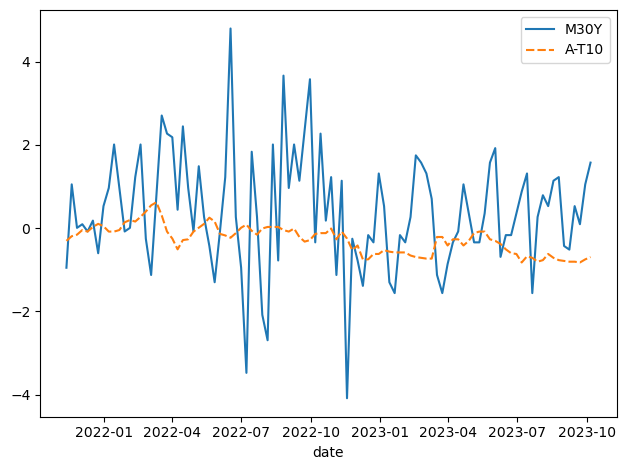

In [160]:
# Last 2 Years
sns.lineplot(norm_features('M30Y','A-T10').iloc[-100:])
plt.tight_layout()

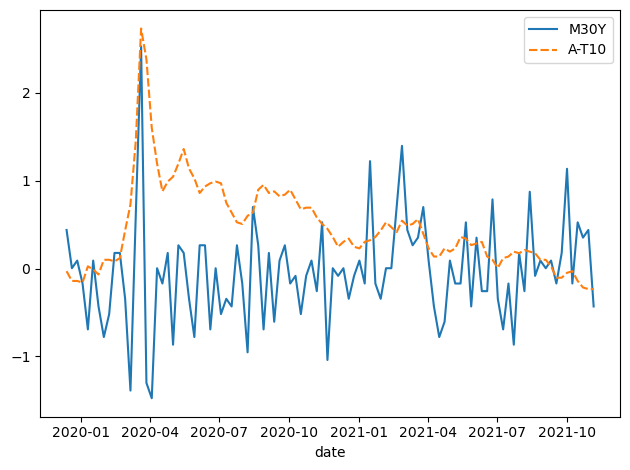

In [163]:
# COVID
sns.lineplot(norm_features('M30Y','A-T10').iloc[-200:-100])
plt.tight_layout()

Vector Error Correction Model

Hypothesis Test 2.4
- Null hypothesis: Differenced FED (or any of the features) does not Granger-cause Differenced M30Y.

In [168]:
from statsmodels.tsa.vector_ar.vecm import select_order
from statsmodels.tsa.vector_ar.vecm import select_coint_rank

In [193]:
def vecm(cola,colb,n):
    # Obtaining the AIC
    lag_order = select_order(data=new_df[[cola,colb]], maxlags=10, deterministic = 'n')
    print(lag_order)
    # Cointegration Rank
    rank_test = select_coint_rank(new_df[[cola,colb]], 0, lag_order.aic, method='trace',
                              signif=.05)
    print(rank_test)
    # Parameter Estimation
    model = VECM(new_df[[cola,colb]], deterministic='n',
                 k_ar_diff=lag_order.aic,  
                 coint_rank=rank_test.rank)
    vecm = model.fit()
    print(vecm.test_granger_causality(caused=cola,causing = colb, signif=0.05).summary())
    return vecm.plot_forecast(steps=5, alpha = .05, plot_conf_int= True, n_last_obs=n)

Hypothesis Test 2.4.1
- A-T10 does not Granger-cause M30Y differenced

<statsmodels.tsa.vector_ar.var_model.LagOrderResults object. Selected orders are: AIC -> 7, BIC -> 1, FPE -> 7, HQIC ->  2>
Johansen cointegration test using trace test statistic with 5% significance level
r_0 r_1 test statistic critical value
-------------------------------------
  0   2          309.6          15.49
  1   2          10.49          3.841
-------------------------------------
Granger causality F-test. H_0: A-T10 does not Granger-cause M30Y. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value     df   
-----------------------------------------------
         13.06          1.940   0.000 (8, 4886)
-----------------------------------------------


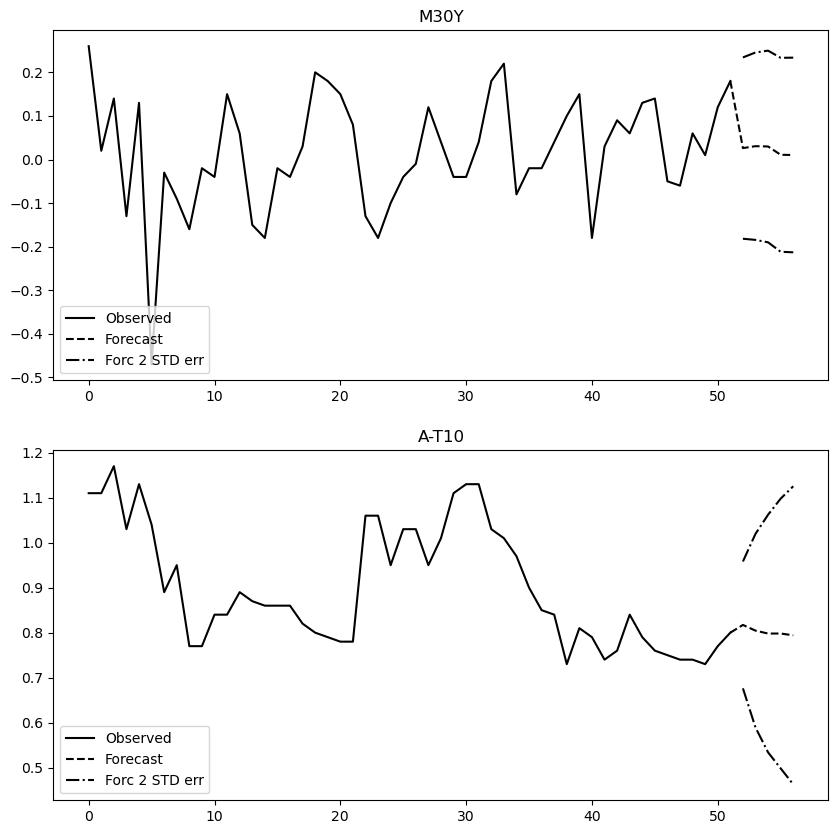

In [194]:
# M30Y and A-T10Y
vecm('M30Y','A-T10',52)

Hypothesis Test 2.4.2
- Differenced FED does not Granger-cause M30Y differenced

<statsmodels.tsa.vector_ar.var_model.LagOrderResults object. Selected orders are: AIC -> 9, BIC -> 1, FPE -> 9, HQIC ->  3>
Johansen cointegration test using trace test statistic with 5% significance level
r_0 r_1 test statistic critical value
-------------------------------------
  0   2          491.9          15.49
  1   2          242.6          3.841
-------------------------------------
Granger causality F-test. H_0: FED does not Granger-cause M30Y. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value     df    
------------------------------------------------
         8.907          1.833   0.000 (10, 4874)
------------------------------------------------


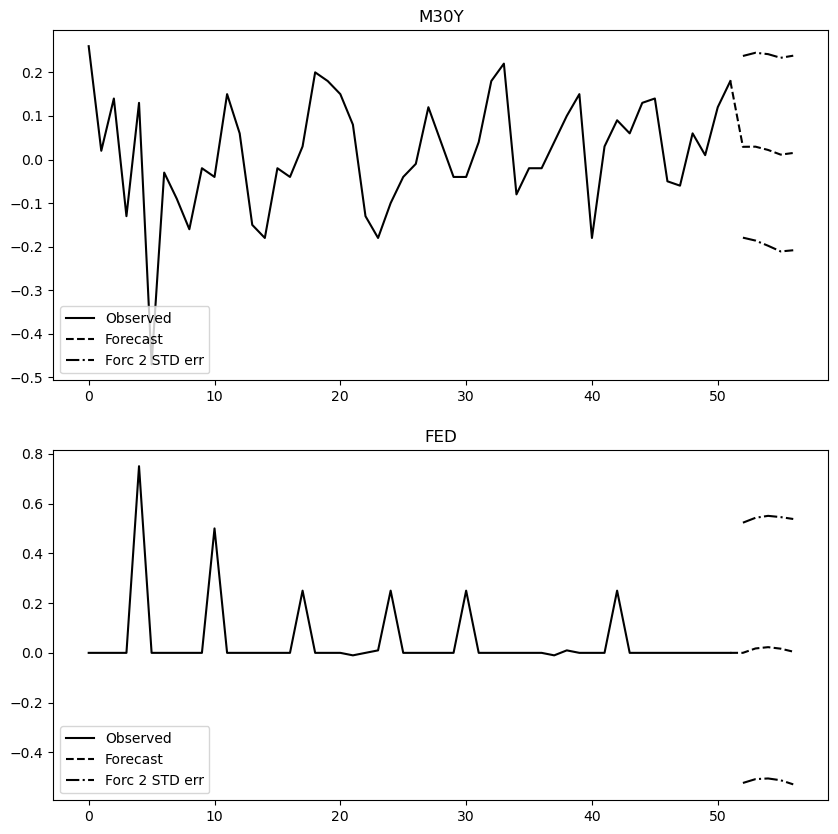

In [195]:
# M30Y and FED
vecm('M30Y','FED',52)

# Volatility Analysis

Garch heteroscedasticity and volatility modeling

Hypothesis Test 3.1
- GARCH effects are not important in explaining volatility 

In [197]:
import arch
import itertools

In [252]:
def garch_model(cola):
    returns = new_df[cola].copy()
    # Obtaining best AIC
    # Define the range of p and q values to search
    p_values = range(1, 5)
    q_values = range(1, 5)
    # Perform grid search
    best_aic = float("inf")
    best_order = None

    for p, q in itertools.product(p_values, q_values):
        model = arch.arch_model(returns, vol='Garch', p=p, q=q, rescale=False)
        results = model.fit(disp='off')
        aic = results.aic

        if aic < best_aic:
            best_aic = aic
            best_order = (p, q)
    print(f'Best AIC: {best_aic}, Best Order: {best_order}')
    model = arch.arch_model(returns, vol = 'Garch', p = best_order[0], q = best_order[1],rescale=False)
    results = model.fit()
    print(results.summary())
    forecast = results.forecast(horizon=5) 
    print(forecast.variance.dropna())

Hypothesis Test 3.1.1
- GARCH effects are not important in explaining volatility in the differenced M30Y time series

In [253]:
# Differenced M30Y
garch_model('M30Y')

Best AIC: -4671.576391414541, Best Order: (1, 4)
Iteration:      1,   Func. Count:      9,   Neg. LLF: 110522.79296879395
Iteration:      2,   Func. Count:     23,   Neg. LLF: 125.5209451331801
Iteration:      3,   Func. Count:     36,   Neg. LLF: -1300.9187563236246
Iteration:      4,   Func. Count:     45,   Neg. LLF: -2045.0109514577061
Iteration:      5,   Func. Count:     54,   Neg. LLF: -2311.017285154403
Iteration:      6,   Func. Count:     63,   Neg. LLF: -2245.259790492387
Iteration:      7,   Func. Count:     72,   Neg. LLF: -2304.84418226902
Iteration:      8,   Func. Count:     81,   Neg. LLF: -2166.3279360192287
Iteration:      9,   Func. Count:     90,   Neg. LLF: -2318.750369584037
Iteration:     10,   Func. Count:     99,   Neg. LLF: -2342.2806888150326
Iteration:     11,   Func. Count:    108,   Neg. LLF: -2342.5627147781906
Iteration:     12,   Func. Count:    117,   Neg. LLF: -2342.7852020718724
Iteration:     13,   Func. Count:    125,   Neg. LLF: -2342.78801790298

Hypothesis Test 3.1.2
- GARCH effects are not important in explaining volatility in the A-T10Y time series

In [254]:
# A-T10Y
garch_model('A-T10')

Best AIC: 1651.1702677507533, Best Order: (1, 2)
Iteration:      1,   Func. Count:      7,   Neg. LLF: 6234742051859499.0
Iteration:      2,   Func. Count:     18,   Neg. LLF: 139631.620408113
Iteration:      3,   Func. Count:     25,   Neg. LLF: 5182.928790717074
Iteration:      4,   Func. Count:     33,   Neg. LLF: 1248.1653406682894
Iteration:      5,   Func. Count:     40,   Neg. LLF: 1225.7833572243728
Iteration:      6,   Func. Count:     47,   Neg. LLF: 896.5129874542097
Iteration:      7,   Func. Count:     54,   Neg. LLF: 1349.8490794449613
Iteration:      8,   Func. Count:     62,   Neg. LLF: 1182.4962364057028
Iteration:      9,   Func. Count:     69,   Neg. LLF: 838.2473929535588
Iteration:     10,   Func. Count:     75,   Neg. LLF: 835.554615413962
Iteration:     11,   Func. Count:     81,   Neg. LLF: 849.9902077774391
Iteration:     12,   Func. Count:     89,   Neg. LLF: 832.7715723812596
Iteration:     13,   Func. Count:     95,   Neg. LLF: 830.737361531018
Iteration:   

# Time Series Decomposition

Decomposing non-differenced yields into trend, season, and residual

In [215]:
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats import anderson

In [261]:
def decomp(col):
    ts_data = df[col].copy()
    seasonal_period = 52*2
    result = seasonal_decompose(ts_data, model='additive', period=seasonal_period)
    # Plot the decomposed components
    plt.figure(figsize=(12, 8))

    plt.subplot(4, 1, 1)
    plt.plot(result.observed, label='Observed')
    plt.legend()

    plt.subplot(4, 1, 2)
    plt.plot(result.trend, label='Trend')
    plt.legend()

    plt.subplot(4, 1, 3)
    plt.plot(result.seasonal, label='Seasonal')
    plt.legend()

    plt.subplot(4, 1, 4)
    plt.plot(result.resid, label='Residuals')
    plt.legend()

    plt.tight_layout()
    plt.show()
    return result

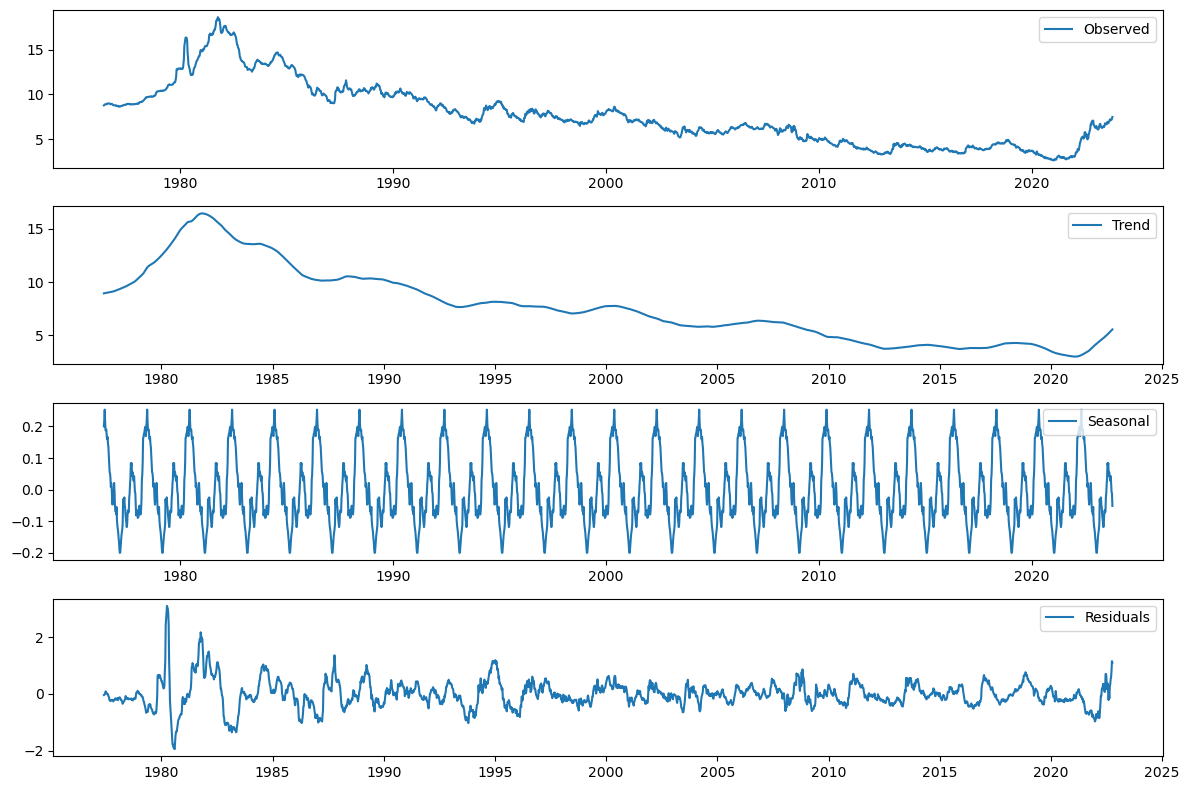

In [262]:
ts = decomp('M30Y')

Hypothesis 4.1
- Are the Residuals normal?
- Null hypothesis: Residuals seem to follow a normal distribution

In [263]:
residuals = ts.resid.dropna().copy()

statistic, critical_values, significance_levels = anderson(residuals)

print(f'Statistic: {statistic}')
print(f'Critical Values: {critical_values}')
print(f'Significance Levels: {significance_levels}')

Statistic: 28.64858249853387
Critical Values: [0.575 0.655 0.786 0.916 1.09 ]
Significance Levels: [15.  10.   5.   2.5  1. ]
